In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/               ## kaggle.json ==> download this json file from your kaggle account

In [3]:
# download the kaggle dataset               
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:07<00:00, 169MB/s]
100% 1.06G/1.06G [00:07<00:00, 153MB/s]


In [5]:
## extract all from the zip file...

import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators in keras....... Which helps to process the data in separate separate batches

from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',          ## it will represent the data class in integers .... 0 = cat    1 = dog
    batch_size = 32,
    image_size = (256, 256)
)


test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',          ## it will represent the data class in integers .... 0 = cat    1 = dog
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
from tensorflow.python import test
# normalize you data .. image

def process(image, label):
  image = tf.cast (image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [9]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (3,3), padding='valid', activation= 'relu', input_shape =(256,256,3)))
model.add(MaxPooling2D(pool_size= (2,2), strides= 2, padding= 'valid' ))

model.add(Conv2D(filters= 64, kernel_size= (3,3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides= 2, padding= 'valid' ))

model.add(Conv2D(filters= 128, kernel_size= (3,3), padding='valid', activation= 'relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides= 2, padding= 'valid' ))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [12]:
  ## compile means back_propagation

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# fit you data and train you model

lrn = model.fit(train_ds, epochs = 10, validation_data= test_ds)

Epoch 1/10
625/625 [==============================] - 70s 88ms/step - loss: 0.6107 - accuracy: 0.6665 - val_loss: 0.5289 - val_accuracy: 0.7484
Epoch 2/10
625/625 [==============================] - 56s 90ms/step - loss: 0.4759 - accuracy: 0.7682 - val_loss: 0.4472 - val_accuracy: 0.7990
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3875 - accuracy: 0.8234 - val_loss: 0.4991 - val_accuracy: 0.7958
Epoch 4/10
625/625 [==============================] - 58s 93ms/step - loss: 0.2981 - accuracy: 0.8705 - val_loss: 0.5214 - val_accuracy: 0.8000
Epoch 5/10
625/625 [==============================] - 57s 90ms/step - loss: 0.1842 - accuracy: 0.9244 - val_loss: 0.6561 - val_accuracy: 0.7876
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1078 - accuracy: 0.9584 - val_loss: 0.9055 - val_accuracy: 0.7714
Epoch 7/10
625/625 [==============================] - 56s 88ms/step - loss: 0.0824 - accuracy: 0.9696 - val_loss: 0.8605 - val_accuracy:

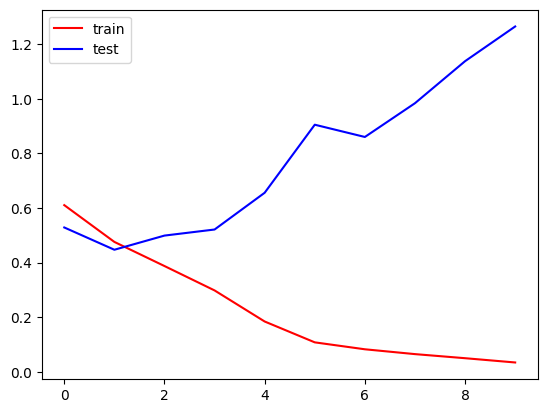

In [15]:
import matplotlib.pyplot as plt

plt.plot(lrn.history['loss'], color= 'red', label= 'train')
plt.plot(lrn.history['val_loss'], color= 'blue', label= 'test')
plt.legend()
plt.show()

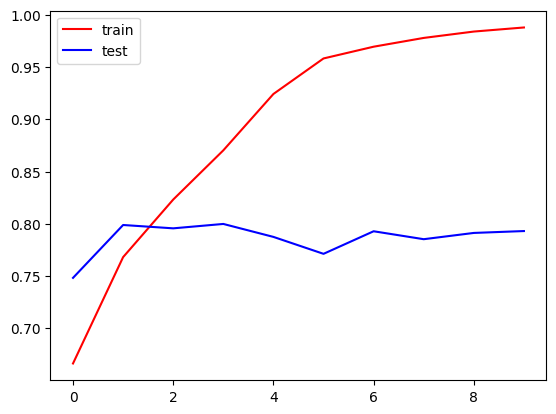

In [16]:
plt.plot(lrn.history['accuracy'], color= 'red', label= 'train')
plt.plot(lrn.history['val_accuracy'], color= 'blue', label= 'test')
plt.legend()
plt.show()

In [33]:
###  This model does not perform well with the test data.... This is a overfitting problem

In [17]:
import cv2

In [22]:
def show(path):
  img = cv2.imread(path)
  plt.imshow(img)


def change_size(path):
  img = cv2.imread(path)
  img = cv2.resize(img, (256, 256))
  img_input = img.reshape((1,256,256,3))
  print(model.predict(img_input))


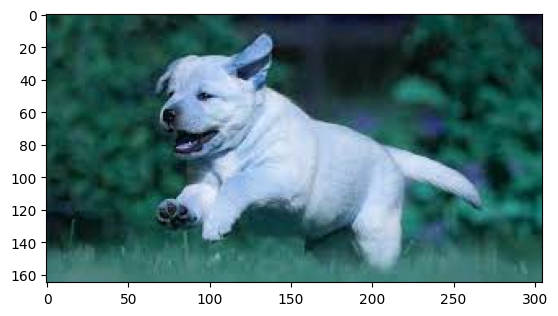

In [23]:
show('/content/download.jpeg')

In [24]:
change_size('/content/download.jpeg')

1/1 [==============================] - 0s 20ms/step
[[1.]]


## 2... Use Dropout layer and BatchNormalization to improve the model performance ... This methods will helps to reduce the overfitting problem

In [25]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size= (3,3), padding='valid', activation= 'relu', input_shape =(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides= 2, padding= 'valid' ))

model.add(Conv2D(filters= 64, kernel_size= (3,3), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides= 2, padding= 'valid' ))

model.add(Conv2D(filters= 128, kernel_size= (3,3), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2), strides= 2, padding= 'valid' ))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [27]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
lrn = model.fit(train_ds, epochs = 10, validation_data= test_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.9715 - accuracy: 0.5563 - val_loss: 0.7021 - val_accuracy: 0.6260
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6272 - accuracy: 0.6583 - val_loss: 0.5603 - val_accuracy: 0.7074
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5392 - accuracy: 0.7348 - val_loss: 0.5383 - val_accuracy: 0.7252
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4828 - accuracy: 0.7723 - val_loss: 0.4839 - val_accuracy: 0.7612
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4205 - accuracy: 0.8110 - val_loss: 0.4304 - val_accuracy: 0.8072
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3578 - accuracy: 0.8445 - val_loss: 0.4595 - val_accuracy: 0.7978
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2882 - accuracy: 0.8816 - val_loss: 0.4177 - val_ac

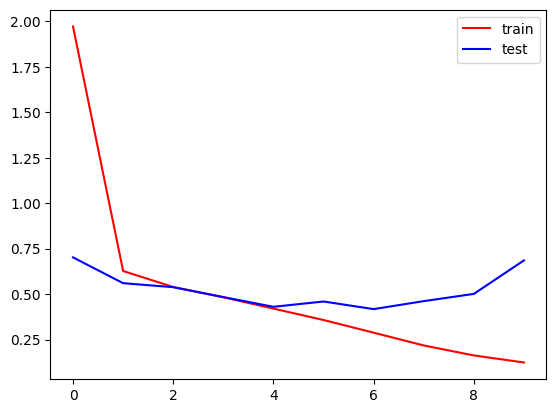

In [29]:
plt.plot(lrn.history['loss'], color= 'red', label= 'train')
plt.plot(lrn.history['val_loss'], color= 'blue', label= 'test')
plt.legend()
plt.show()

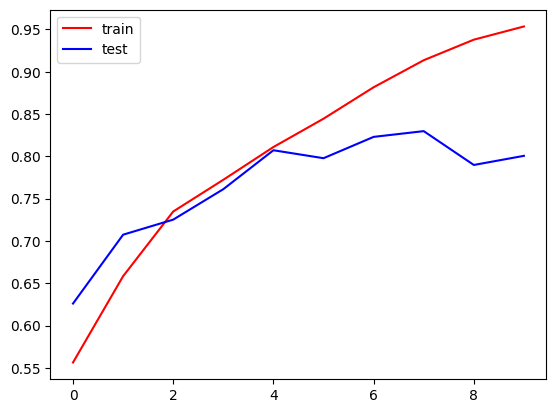

In [30]:
plt.plot(lrn.history['accuracy'], color= 'red', label= 'train')
plt.plot(lrn.history['val_accuracy'], color= 'blue', label= 'test')
plt.legend()
plt.show()

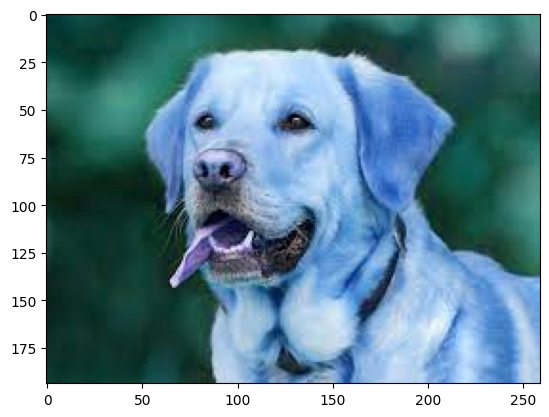

In [31]:
show('/content/download_2.jpeg')

In [32]:
change_size('/content/download_2.jpeg')

1/1 [==============================] - 0s 207ms/step
[[1.]]
